__Eri rypälelajikkeet - Päätöspuu__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('http://taanila.fi/wine.xlsx')
#Vaihdetaan columns nimiksi
df.columns=['Lajike','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
            'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']
df.head()

,Lajike,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#Asetetaan feature-matriisi
X=df.drop('Lajike',axis=1)

#Asetetaan target (Y)
y=df['Lajike']

In [4]:
#Jaetaan malli opetus ja testidataan
from sklearn.model_selection import train_test_split
X_opetus, X_testi, y_opetus, y_testi = train_test_split(X,y,random_state=4)

In [5]:
#Tuodaan Päätöspuu-malli ja sovitetaan data malliin
from sklearn import tree
malli=tree.DecisionTreeClassifier(max_depth=4)
malli.fit(X_opetus,y_opetus)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
#Lasketaan mallin mukaiset ennusteet opetus- ja testidatalle
y_opetus_malli = malli.predict(X_opetus)
y_testi_malli = malli.predict(X_testi)

In [7]:
#Mallin hyvyys opetusdataan
from sklearn.metrics import accuracy_score
accuracy_score(y_opetus,y_opetus_malli)

0.9849624060150376

In [8]:
#Mallin hyvyys testidataan
accuracy_score(y_testi,y_testi_malli)

0.8888888888888888

In [9]:
#Confusion-matriisi opetusdatalle:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_opetus, y_opetus_malli))

[[42  2  0]
 [ 0 56  0]
 [ 0  0 33]]


In [10]:
#Confusion-matriisi testidatalle:

print(confusion_matrix(y_testi, y_testi_malli))

[[15  0  0]
 [ 1 13  1]
 [ 0  3 12]]


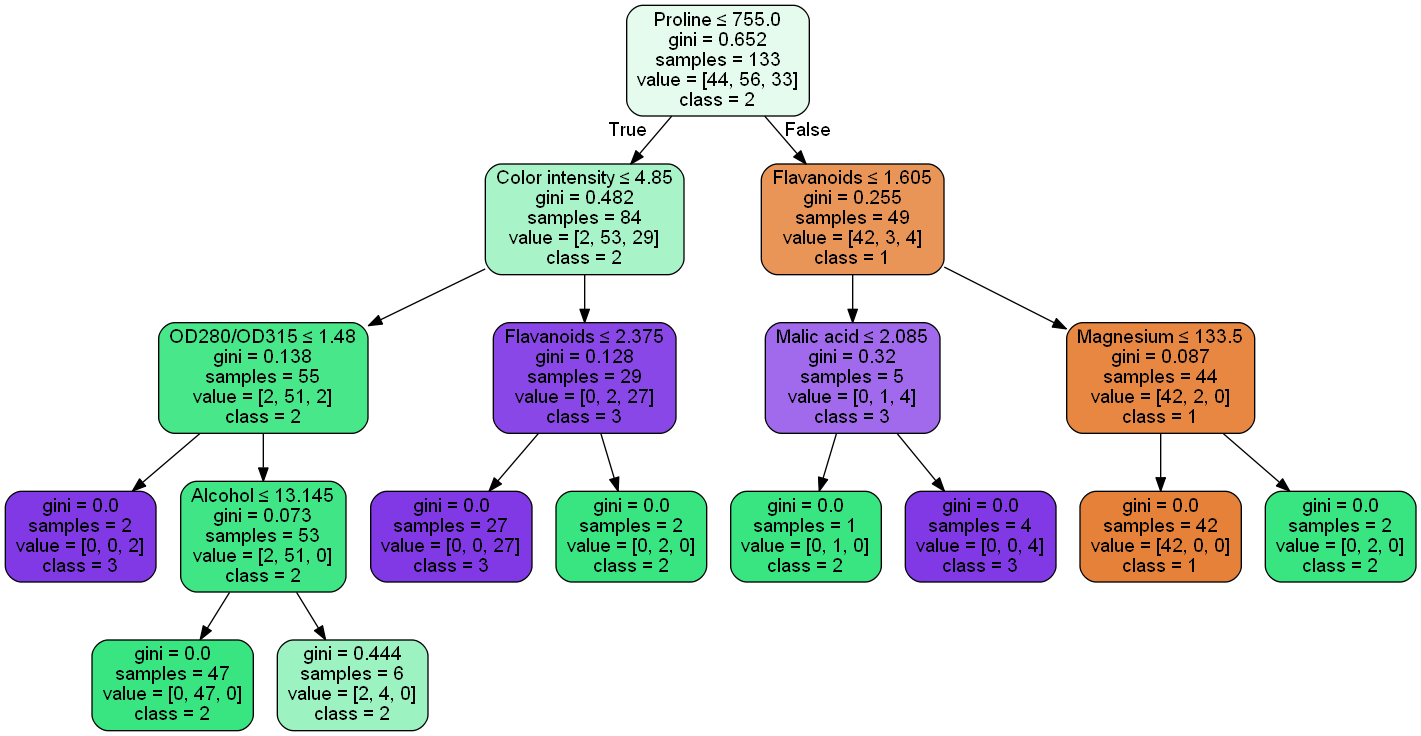

In [11]:
import pydotplus 
from IPython.display import Image  

dot_data = tree.export_graphviz(malli, out_file=None, 
                         feature_names=X.columns,
                         class_names=['1', '2', '3'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())